In [62]:
import random
from pathlib import Path

import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [63]:
class DrawDice:

    """Функция отрисовки точек"""
    def draw_dots(self, value: int, size=200, bg_color='white', text_color='black', path_to_save=None) -> None:
        img = Image.new('RGBA', (size, size), (0, 0, 0, 0))
        image = ImageDraw.Draw(img) # создание из картинки объекта на котором можно рисовать
        image.rounded_rectangle([0, 0, size, size], radius=25, fill=bg_color) # рисование прямоугольника с закругленными краями
        match value:
            case 1:
                image.ellipse([size // 2 - 20, size // 2 - 20, size // 2 + 20, size // 2 + 20], fill=text_color)
            case 2:
                shift = 60 # сдвиг по оси
                image.ellipse(
                    [size // 2 - 20 - shift, size // 2 - 20 - shift, size // 2 + 20 - shift, size // 2 + 20 - shift],
                    fill=text_color)
                image.ellipse(
                    [size // 2 - 20 + shift, size // 2 - 20 + shift, size // 2 + 20 + shift, size // 2 + 20 + shift],
                    fill=text_color)
            case 3:
                shift = 60
                image.ellipse(
                    [size // 2 - 20 - shift, size // 2 - 20 - shift, size // 2 + 20 - shift, size // 2 + 20 - shift],
                    fill=text_color)
                image.ellipse([size // 2 - 20, size // 2 - 20, size // 2 + 20, size // 2 + 20], fill=text_color)
                image.ellipse(
                    [size // 2 - 20 + shift, size // 2 - 20 + shift, size // 2 + 20 + shift, size // 2 + 20 + shift],
                    fill=text_color)
            case 4:
                shift = 60
                image.ellipse([size // 2 - 20 - shift, size // 2 - 20 - shift, size // 2 + 20 - shift, size // 2 + 20 - shift], fill=text_color)
                image.ellipse([size // 2 - 20 - shift, size // 2 - 20 + shift, size // 2 + 20 - shift, size // 2 + 20 + shift], fill=text_color)
                image.ellipse([size // 2 - 20 + shift, size // 2 - 20 - shift, size // 2 + 20 + shift, size // 2 + 20 - shift], fill=text_color)
                image.ellipse([size // 2 - 20 + shift, size // 2 - 20 + shift, size // 2 + 20 + shift, size // 2 + 20 + shift], fill=text_color)
            case 5:
                shift = 60
                image.ellipse([size // 2 - 20 - shift, size // 2 - 20 - shift, size // 2 + 20 - shift, size // 2 + 20 - shift], fill=text_color)
                image.ellipse([size // 2 - 20 - shift, size // 2 - 20 + shift, size // 2 + 20 - shift, size // 2 + 20 + shift], fill=text_color)
                image.ellipse([size // 2 - 20, size // 2 - 20, size // 2 + 20, size // 2 + 20], fill=text_color)
                image.ellipse([size // 2 - 20 + shift, size // 2 - 20 - shift, size // 2 + 20 + shift, size // 2 + 20 - shift], fill=text_color)
                image.ellipse([size // 2 - 20 + shift, size // 2 - 20 + shift, size // 2 + 20 + shift, size // 2 + 20 + shift], fill=text_color)
            case 6:
                shift = 60
                image.ellipse([size // 2 - 20 - shift, size // 2 - 20 - shift, size // 2 + 20 - shift, size // 2 + 20 - shift], fill=text_color)
                image.ellipse([size // 2 - 20 - shift, size // 2 - 20, size // 2 + 20 - shift, size // 2 + 20], fill=text_color)
                image.ellipse([size // 2 - 20 - shift, size // 2 - 20 + shift, size // 2 + 20 - shift, size // 2 + 20 + shift], fill=text_color)
                image.ellipse([size // 2 - 20 + shift, size // 2 - 20 - shift, size // 2 + 20 + shift, size // 2 + 20 - shift], fill=text_color)
                image.ellipse([size // 2 - 20 + shift, size // 2 - 20, size // 2 + 20 + shift, size // 2 + 20], fill=text_color)
                image.ellipse([size // 2 - 20 + shift, size // 2 - 20 + shift, size // 2 + 20 + shift, size // 2 + 20 + shift], fill=text_color)
            case _:
                raise ValueError
        display(img) # отображение картинки
        if path_to_save:
            img.save(path_to_save, 'PNG')

    """Функция отрисовки арабских цифр"""
    def draw_arabic(self, value: int, size=200, bg_color='white', text_color='black', path_to_save=None) -> None:
        img = Image.new('RGBA', (size, size), (255, 0, 0, 0))
        image = ImageDraw.Draw(img)
        image.rounded_rectangle([0, 0, size, size], radius=25, fill=bg_color)
        # anchor - центрирование, mm - по середине
        image.text((size // 2, size // 2), str(value), fill=text_color, anchor='mm', 
                   font=ImageFont.truetype("arial.ttf", 29))
        display(img)
        if path_to_save:
            img.save(path_to_save, 'PNG')

    """Функция отрисовки римских цифр"""
    def draw_roman(self, value: int, size=200, bg_color='white', text_color='black', path_to_save=None) -> None:
        conv = [[1000, 'M'], [900, 'CM'], [500, 'D'], [400, 'CD'],
                [100, 'C'], [90, 'XC'], [50, 'L'], [40, 'XL'],
                [10, 'X'], [9, 'IX'], [5, 'V'], [4, 'IV'],
                [1, 'I']]
        result = ''
        for denom, roman_digit in conv:
            result += roman_digit * (value // denom)
            value %= denom
        img = Image.new('RGBA', (size, size), (255, 0, 0, 0))
        image = ImageDraw.Draw(img)
        image.rounded_rectangle([0, 0, size, size], radius=25, fill=bg_color)
        image.text((size // 2, size // 2), result, fill=text_color, anchor='mm', font=ImageFont.truetype("arial.ttf", 29))
        display(img)
        if path_to_save:
            img.save(path_to_save, 'PNG')

    """Главная функция отрисовки стороны кубика"""
    def draw_dice(self, value: int, draw_type='dots', size=200, bg_color='white', value_color='black', path_to_save=None) -> None:
        match draw_type:
            case 'dots':
                self.draw_dots(value, size, bg_color, value_color, path_to_save)
            case 'arabic':
                self.draw_arabic(value, size, bg_color, value_color, path_to_save)
            case 'roman':
                self.draw_roman(value, size, bg_color, value_color, path_to_save)

    """Функция отрисовки рандомной грани"""
    def draw_random(self) -> None:
        value = random.randint(1, 6)
        draw_type = random.choice(['dots', 'arabic', 'roman'])
        bg_color = tuple(np.random.choice(range(256), size=3))
        value_color = tuple(np.random.choice(range(256), size=3))
        self.draw_dice(value, draw_type, bg_color=bg_color, value_color=value_color)

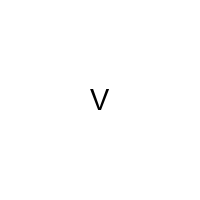

In [64]:
dice = DrawDice()
dice.draw_dice(value=5, size=200, draw_type='roman', path_to_save='roman.png')

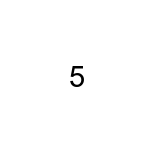

In [65]:
dice.draw_dice(value=5, size=155, draw_type='arabic', path_to_save='arabic.png')

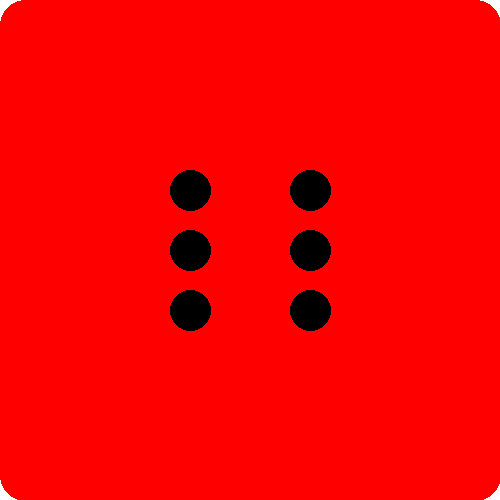

In [66]:
dice.draw_dice(value=6, size=500, draw_type='dots',
 bg_color='red', path_to_save='dots.png')


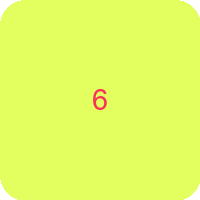

In [96]:
dice.draw_random()

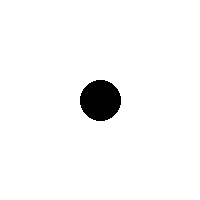

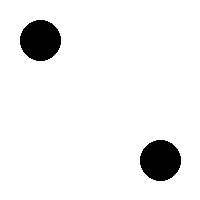

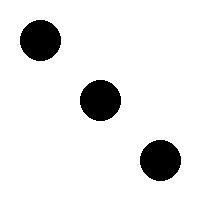

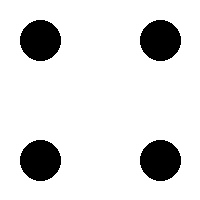

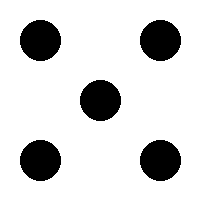

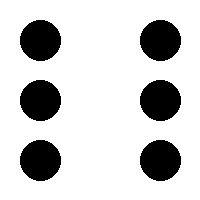

In [68]:
Path('all_dices').mkdir(parents=True, exist_ok=True)
for i in range(1, 7):
    dice.draw_dice(i, 'dots', path_to_save=Path(f'all_dices/{i}.png'))